In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
pd.options.display.max_rows = 5
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 関数 (入力データ・正解ラベルの作成)
def create_data(data, look_back):
    data_X, data_Y = [], []
    for i in range(look_back, len(data)):
        data_X.append(data[i-look_back:i, 0])
        data_Y.append(data[i, 0])
    return np.array(data_X), np.array(data_Y)

In [5]:
# データセット
data = pd.read_csv('/content/drive/MyDrive/Datasets/nikkei225.csv', usecols=[1], engine='python', skipfooter=3)
data

,終値
0,18980.0
1,19330.0
...,...
2061,7170.0
2062,7410.0


In [6]:
data = data.values
data

array([[18980.],
       [19330.],
       [19460.],
       ...,
       [ 7050.],
       [ 7170.],
       [ 7410.]])

In [7]:
data = data.astype('float32')
data.dtype

dtype('float32')

In [8]:
# データ分割
train_size = int(len(data) * 0.67)
train = data[0:train_size, :]
test = data[train_size:len(data), :]
train.shape
test.shape

(1382, 1)

(681, 1)

In [9]:
# スケーリング (正規化)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_train = scaler.fit(train)
scaler_train

MinMaxScaler()

In [10]:
train = scaler_train.transform(train)
test = scaler_train.transform(test)
train

array([[0.85331225],
       [0.8809148 ],
       [0.89116716],
       ...,
       [0.04179811],
       [0.05441642],
       [0.06309146]], dtype=float32)

In [11]:
# 入力データと正解ラベルを作成
look_back = 3
train_X, train_Y = create_data(train, look_back)
test_X, test_Y = create_data(test, look_back)
train_X
train_Y

array([[0.85331225, 0.8809148 , 0.89116716],
       [0.8809148 , 0.89116716, 0.89116716],
       [0.89116716, 0.89116716, 0.8604101 ],
       ...,
       [0.04731864, 0.05047321, 0.04948741],
       [0.05047321, 0.04948741, 0.04179811],
       [0.04948741, 0.04179811, 0.05441642]], dtype=float32)

array([0.89116716, 0.8604101 , 0.8422713 , ..., 0.04179811, 0.05441642,
       0.06309146], dtype=float32)

In [12]:
# データ整形
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
train_X

array([[[0.85331225],
        [0.8809148 ],
        [0.89116716]],

       [[0.8809148 ],
        [0.89116716],
        [0.89116716]],

       [[0.89116716],
        [0.89116716],
        [0.8604101 ]],

       ...,

       [[0.04731864],
        [0.05047321],
        [0.04948741]],

       [[0.05047321],
        [0.04948741],
        [0.04179811]],

       [[0.04948741],
        [0.04179811],
        [0.05441642]]], dtype=float32)

In [13]:
# モデル構築 (LSTM)
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(look_back, 1), return_sequences=True))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model

<Sequential name=sequential, built=True>

In [14]:
# 学習
model.fit(train_X, train_Y, epochs=15, batch_size=1, verbose=2)
model

Epoch 1/15
1379/1379 - 13s - 10ms/step - loss: 0.0048
Epoch 2/15
1379/1379 - 8s - 6ms/step - loss: 9.2238e-04
Epoch 3/15
1379/1379 - 6s - 4ms/step - loss: 8.4692e-04
Epoch 4/15
1379/1379 - 9s - 7ms/step - loss: 9.0652e-04
Epoch 5/15
1379/1379 - 5s - 4ms/step - loss: 8.1090e-04
Epoch 6/15
1379/1379 - 4s - 3ms/step - loss: 7.6438e-04
Epoch 7/15
1379/1379 - 5s - 4ms/step - loss: 7.2261e-04
Epoch 8/15
1379/1379 - 7s - 5ms/step - loss: 6.8121e-04
Epoch 9/15
1379/1379 - 5s - 4ms/step - loss: 6.3951e-04
Epoch 10/15
1379/1379 - 6s - 4ms/step - loss: 5.6741e-04
Epoch 11/15
1379/1379 - 4s - 3ms/step - loss: 4.9908e-04
Epoch 12/15
1379/1379 - 6s - 4ms/step - loss: 5.1170e-04
Epoch 13/15
1379/1379 - 5s - 4ms/step - loss: 5.0220e-04
Epoch 14/15
1379/1379 - 4s - 3ms/step - loss: 5.0397e-04
Epoch 15/15
1379/1379 - 7s - 5ms/step - loss: 4.9262e-04


<Sequential name=sequential, built=True>

In [15]:
# 予測データの作成
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
train_predict

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.8819981 ],
       [0.88632435],
       [0.85978574],
       ...,
       [0.04854374],
       [0.04346864],
       [0.05127364]], dtype=float32)

In [16]:
# スケールしたデータを元に戻す
train_predict = scaler_train.inverse_transform(train_predict)
train_Y = scaler_train.inverse_transform([train_Y])
test_predict = scaler_train.inverse_transform(test_predict)
test_Y = scaler_train.inverse_transform([test_Y])
train_predict
train_Y

array([[19343.736],
       [19398.592],
       [19062.082],
       ...,
       [ 8775.535],
       [ 8711.183],
       [ 8810.149]], dtype=float32)

array([[19459.99981327, 19070.00016422, 18840.00060374, ...,
         8690.00008672,  8850.00017529,  8959.99966934]])

In [17]:
# 予測精度の計算
train_score = math.sqrt(mean_squared_error(train_Y[0], train_predict[:, 0]))
test_score = math.sqrt(mean_squared_error(test_Y[0], test_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 222.00 RMSE
Test Score: 144.70 RMSE


In [18]:
# プロットのためのデータ整形
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict
train_predict_plot.shape
train_predict_plot

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2):len(data), :] = test_predict

(2063, 1)

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

Text(0.5, 1.0, 'nikkei225')

Text(0.5, 0, 'time (day)')

Text(0, 0.5, 'closing price')

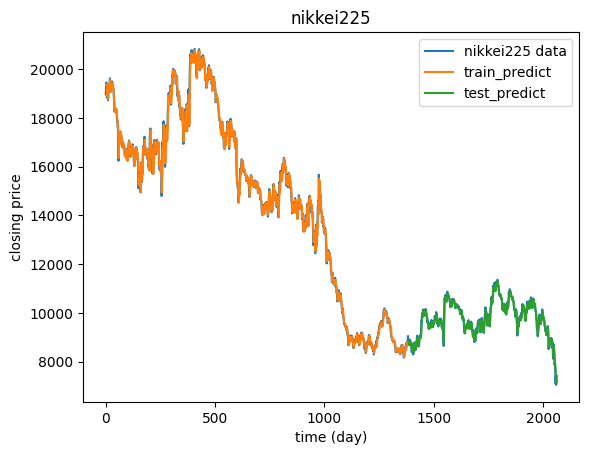

In [19]:
# データのプロット
plt.title("nikkei225")
plt.xlabel("time (day)")
plt.ylabel("closing price")
plt.plot(data, label='nikkei225 data')
plt.plot(train_predict_plot, label='train_predict')
plt.plot(test_predict_plot, label='test_predict')
plt.legend(loc='upper right')
plt.show()